In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('whitegrid')

In [2]:
demo = pd.read_excel('Vendas_analise_yotube.xlsx')
demo.head()

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,Localidade,Unnamed: 9
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França - Europa,NaN
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos - América do Norte,NaN
2,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Gonzalez, Martin",Chile - América do Sul,NaN
3,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Ruiz, Victor",Alemanha - Europa,NaN
4,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,5.0,"Nelson, Alex",Estados Unidos - América do Norte,NaN


### Análise exploratória dos dados 1.0
    Análise dos tipos Análise das colunasdos dados.
### Análise das colunas.
        1.1 - Data da Venda
        1.2 - Produto
        1.3 - Categoria
        1.4 - PrecoUnitario
        1.5 - Custo Unitário
        1.6 - Marca
        1.7 - Qtd. Vendida
        1.8 - Nome Cliente
        1.9 - Localidade
        1.1.1 - Unnamed: 9
        
        
### Análises gráficas 2.0
        2.1 - Data da Venda
        2.2 - Produto
        2.3 - Categoria
        2.4 - PrecoUnitario
        2.5 - Custo Unitário
        2.6 - Marca
        2.7 - Qtd. Vendida
        2.8 - Nome Cliente
        2.9 - Localidade
        

In [3]:
demo.columns

Index(['Data da Venda', 'Produto', 'Categoria', 'PrecoUnitario',
       'Custo Unitário', 'Marca', 'Qtd. Vendida', 'Nome Cliente', 'Localidade',
       'Unnamed: 9'],
      dtype='object')

In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203888 entries, 0 to 203887
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Data da Venda   203888 non-null  object 
 1   Produto         203882 non-null  object 
 2   Categoria       203882 non-null  object 
 3   PrecoUnitario   203882 non-null  float64
 4   Custo Unitário  203882 non-null  float64
 5   Marca           203882 non-null  object 
 6   Qtd. Vendida    203882 non-null  float64
 7   Nome Cliente    203882 non-null  object 
 8   Localidade      203882 non-null  object 
 9   Unnamed: 9      2 non-null       object 
dtypes: float64(3), object(7)
memory usage: 15.6+ MB


In [5]:
demo.isnull().sum()

Data da Venda          0
Produto                6
Categoria              6
PrecoUnitario          6
Custo Unitário         6
Marca                  6
Qtd. Vendida           6
Nome Cliente           6
Localidade             6
Unnamed: 9        203886
dtype: int64

# Análise das colunas.
## 1.1.1 - Unnamed: 9
### Eliminando a coluna pois não é necessário, pois não há dados para serem analisados.

In [6]:
demo.drop('Unnamed: 9', axis=1, inplace=True)
demo.head(3)

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,Localidade
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França - Europa
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos - América do Norte
2,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Gonzalez, Martin",Chile - América do Sul


In [7]:
demo = demo.dropna()

#### 1.0 - Quantidade de valores nulos em cada coluna.

In [8]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203882 entries, 0 to 203881
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Data da Venda   203882 non-null  object 
 1   Produto         203882 non-null  object 
 2   Categoria       203882 non-null  object 
 3   PrecoUnitario   203882 non-null  float64
 4   Custo Unitário  203882 non-null  float64
 5   Marca           203882 non-null  object 
 6   Qtd. Vendida    203882 non-null  float64
 7   Nome Cliente    203882 non-null  object 
 8   Localidade      203882 non-null  object 
dtypes: float64(3), object(6)
memory usage: 15.6+ MB


In [9]:
demo.isnull().sum()

Data da Venda     0
Produto           0
Categoria         0
PrecoUnitario     0
Custo Unitário    0
Marca             0
Qtd. Vendida      0
Nome Cliente      0
Localidade        0
dtype: int64

In [10]:
demo['Categoria'].unique()

array(['Sistema de Som', 'Ventiladores', 'Acessórios para Câmeras',
       'Games', 'Jogos de Tabuleiro', 'Headphone Bluetooth', 'Monitores',
       'Car Video', 'Acessórios para Computador', 'Caneta Gravadora',
       'Cafeteira', 'VCD & DVD', 'Movie DVD', 'Acessórios para Celular',
       'MP4&MP3', 'Laptops', 'Impressoras, Scanners & Fax',
       'Water Heaters', 'Telefones p/ Casa e Escritório',
       'Ar Condicionado'], dtype=object)

In [11]:
avaliar1 = demo.groupby(['Categoria','Produto']).sum()
avaliar1

PrecoUnitario  \
Categoria                  Produto                                                
Acessórios para Celular    Azultooth Active Headphones L15 Preto       11959.08   
Acessórios para Computador Laptop Keyboard X105 Branco                  2539.90   
                           Laptop Keyboard X105 Marrom                  6234.30   
                           Laptop Keyboard X105 Prata                   3925.30   
                           Laptop Keyboard X105 Preto                   2770.80   
...                                                                         ...   
Water Heaters              Water Heater 1.5GPM E0800 Vermelho          19312.50   
                           Water Heater 2.6GPM E0900 Azul              37084.00   
                           Water Heater 2.6GPM E0900 Verde             35052.00   
                           Water Heater 4.0GPM M1250 Vermelho          57743.00   
                           Water Heater 7.2GPM X1800 Branco           162250.00   

                                                                  Custo Unitário  \
Categoria                  Produto                                                 
Acessórios para Celular    Azultooth Active Headphones L15 Preto         3962.44   
Acessórios para Computador Laptop Keyboard X105 Branco                    841.50   
                           Laptop Keyboard X105 Marrom                   2065.50   
                           Laptop Keyboard X105 Prata                    1300.50   
                           Laptop Keyboard X105 Preto                     918.00   
...                                                                          ...   
Water Heaters              Water Heater 1.5GPM E0800 Vermelho            9846.00   
                           Water Heater 2.6GPM E0900 Azul               18906.27   
                           Water Heater 2.6GPM E0900 Verde              17870.31   
                           Water Heater 4.0GPM M1250 Vermelho           26553.75   
                           Water Heater 7.2GPM X1800 Branco             53757.00   

                                                                  Qtd. Vendida  
Categoria                  Produto                                              
Acessórios para Celular    Azultooth Active Headphones L15 Preto         157.0  
Acessórios para Computador Laptop Keyboard X105 Branco                    25.0  
                           Laptop Keyboard X105 Marrom                    57.0  
                           Laptop Keyboard X105 Prata                     30.0  
                           Laptop Keyboard X105 Preto                     29.0  
...                                                                        ...  
Water Heaters              Water Heater 1.5GPM E0800 Vermelho            153.0  
                           Water Heater 2.6GPM E0900 Azul                135.0  
                           Water Heater 2.6GPM E0900 Verde               129.0  
                           Water Heater 4.0GPM M1250 Vermelho            149.0  
                           Water Heater 7.2GPM X1800 Branco              208.0  

[447 rows x 3 columns]

In [12]:
avaliar2 = demo.groupby('Categoria').sum()
avaliar2

,PrecoUnitario,Custo Unitário,Qtd. Vendida
Categoria,,,
Acessórios para Celular,1.195908e+04,3962.44,157.0
Acessórios para Computador,1.970120e+04,6527.25,364.0
Acessórios para Câmeras,5.532685e+06,1851338.64,27386.0
Ar Condicionado,4.388331e+04,14539.68,158.0
Cafeteira,3.867180e+05,140084.75,778.0
Caneta Gravadora,8.433613e+05,383960.22,8865.0
Car Video,1.270690e+05,42340.88,283.0
Games,2.599471e+06,1190287.08,92601.0
Headphone Bluetooth,6.578594e+05,261659.19,10017.0


In [13]:
avaliar2.index

Index(['Acessórios para Celular', 'Acessórios para Computador',
       'Acessórios para Câmeras', 'Ar Condicionado', 'Cafeteira',
       'Caneta Gravadora', 'Car Video', 'Games', 'Headphone Bluetooth',
       'Impressoras, Scanners & Fax', 'Jogos de Tabuleiro', 'Laptops',
       'MP4&MP3', 'Monitores', 'Movie DVD', 'Sistema de Som',
       'Telefones p/ Casa e Escritório', 'VCD & DVD', 'Ventiladores',
       'Water Heaters'],
      dtype='object', name='Categoria')

### Faremos uma lista do tipo de categoria que tem no nosso arquivo.

In [14]:
lista_categoria = []

for x in avaliar2.index:
    lista_categoria.append(x)

lista_categoria

['Acessórios para Celular',
 'Acessórios para Computador',
 'Acessórios para Câmeras',
 'Ar Condicionado',
 'Cafeteira',
 'Caneta Gravadora',
 'Car Video',
 'Games',
 'Headphone Bluetooth',
 'Impressoras, Scanners & Fax',
 'Jogos de Tabuleiro',
 'Laptops',
 'MP4&MP3',
 'Monitores',
 'Movie DVD',
 'Sistema de Som',
 'Telefones p/ Casa e Escritório',
 'VCD & DVD',
 'Ventiladores',
 'Water Heaters']

In [15]:
demo['Marca'].unique()

array(['Litware ', 'Litware', 'Contoso', 'Hashtag Toys',
       'Southridge Video', 'Northwind Traders', 'Proseware',
       'Wide World Importers', 'Contoso '], dtype=object)

In [16]:
lista_Marca = []

for x in demo['Marca'].unique():
    lista_Marca.append(x)

lista_Marca

['Litware ',
 'Litware',
 'Contoso',
 'Hashtag Toys',
 'Southridge Video',
 'Northwind Traders',
 'Proseware',
 'Wide World Importers',
 'Contoso ']

In [17]:
for d,i in enumerate(lista_Marca):
    print(d, i)



0 Litware 
1 Litware
2 Contoso
3 Hashtag Toys
4 Southridge Video
5 Northwind Traders
6 Proseware
7 Wide World Importers
8 Contoso 


In [18]:
lista_marca = []

for x in lista_Marca:
    if x == 'Litware ' or x == 'Contoso ':
        continue
    else:
        lista_marca.append(x)
        
lista_marca

['Litware',
 'Contoso',
 'Hashtag Toys',
 'Southridge Video',
 'Northwind Traders',
 'Proseware',
 'Wide World Importers']

In [19]:
avaliar3 = demo.groupby('Nome Cliente').sum()
avaliar3

,PrecoUnitario,Custo Unitário,Qtd. Vendida
Nome Cliente,,,
"Adams, Aaron",1207.120,478.62,16.0
"Adams, Adam",3198.660,1394.47,21.0
"Adams, Alex",1146.110,467.01,13.0
"Adams, Alexandra",79.800,36.70,1.0
"Adams, Allison",3829.880,1341.03,35.0
...,...,...,...
"Zimmerman, Jack",2881.130,1341.34,21.0
"Zimmerman, Jenny",2212.250,752.52,31.0
"Zimmerman, Krystal",1707.260,725.04,24.0


In [20]:
demo['Nome Cliente'].value_counts()

Yang, Jon              177
Blue, Paige             69
Patterson, Angelica     52
Wilson, Benjamin        51
Rubio, Marvin           50
                      ... 
Wang, Jason              1
Anand, Louis             1
Price, Jacqueline        1
Simmons, Luis            1
Diaz, Elizabeth          1
Name: Nome Cliente, Length: 18334, dtype: int64

---------------------------------

### Tratando a coluna Localidade.
# 1.9 - Localidade


In [21]:
demo.head()

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,Localidade
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França - Europa
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos - América do Norte
2,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Gonzalez, Martin",Chile - América do Sul
3,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Ruiz, Victor",Alemanha - Europa
4,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,5.0,"Nelson, Alex",Estados Unidos - América do Norte


### Separando País e Região da coluna Localidade.
#### 1.9 - Localidade

In [22]:
País = demo['Localidade'].apply(lambda x : x.split(' - ')[0])
Regiao = demo['Localidade'].apply(lambda x : x.split(' - ')[1])
Regiao

0                   Europa
1         América do Norte
2           América do Sul
3                   Europa
4         América do Norte
                ...       
203877              Europa
203878      América do Sul
203879    América do Norte
203880    América do Norte
203881    América do Norte
Name: Localidade, Length: 203882, dtype: object

In [23]:
País

0                 França
1         Estados Unidos
2                  Chile
3               Alemanha
4         Estados Unidos
               ...      
203877       Reino Unido
203878             Chile
203879    Estados Unidos
203880    Estados Unidos
203881    Estados Unidos
Name: Localidade, Length: 203882, dtype: object

#### Adicionando ao DataFrame.

In [24]:
demo['País'] = País
demo['Continente'] = Regiao
demo.head(3)

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,Localidade,País,Continente
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França - Europa,França,Europa
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos - América do Norte,Estados Unidos,América do Norte
2,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Gonzalez, Martin",Chile - América do Sul,Chile,América do Sul


In [25]:
demo['Continente'].unique()

array(['Europa', 'América do Norte', 'América do Sul', 'África', 'Ásia',
       'Oceania'], dtype=object)

In [26]:
demo['País'].unique()

array(['França', 'Estados Unidos', 'Chile', 'Alemanha', 'África do Sul',
       'Brasil', 'Canadá', 'Reino Unido', 'Singapura', 'Portugal',
       'Japão', 'Rússia', 'Eslovênia', 'Grécia', 'Irlanda', 'Espanha',
       'Butão', 'China', 'Armênia', 'Suíça', 'Romênia', 'Itália',
       'Holanda', 'Paquistão', 'Quirguistão', 'Turcomenistão',
       'Tailândia', 'Índia', 'Taiwã', 'Polônia', 'Coreia do Sul',
       'Austrália', 'Suécia', 'Irã', 'Dinamarca', 'Malta', 'Síria'],
      dtype=object)

#### Como fiz duas novas colunas, a coluna 'Localidade'não é mais necessária.

In [27]:
demo.drop('Localidade', axis=1, inplace=True)
demo.head(3)

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,País,Continente
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França,Europa
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos,América do Norte
2,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Gonzalez, Martin",Chile,América do Sul


In [28]:
a = demo.groupby('País').sum()
a

,PrecoUnitario,Custo Unitário,Qtd. Vendida
País,,,
Alemanha,2.284677e+06,952420.81,28840.0
Armênia,6.298153e+04,26919.19,1036.0
Austrália,2.359334e+05,96751.23,2935.0
Brasil,2.111032e+06,871948.51,26016.0
Butão,6.893105e+04,30454.34,951.0
Canadá,1.219271e+06,505593.76,14739.0
Chile,2.149685e+06,896748.90,26365.0
China,2.959404e+05,122836.60,3609.0
Coreia do Sul,1.262474e+05,53869.40,1569.0


In [29]:
b = demo.groupby('Continente').sum()
b

,PrecoUnitario,Custo Unitário,Qtd. Vendida
Continente,,,
América do Norte,1.686188e+07,7004546.29,209088.0
América do Sul,4.260717e+06,1768697.41,52381.0
Europa,8.378119e+06,3489698.98,105205.0
Oceania,2.359334e+05,96751.23,2935.0
África,1.061045e+06,440254.36,13486.0
Ásia,1.783667e+06,745533.81,21994.0


In [30]:
c = demo.groupby(['Continente','País']).sum()
c

PrecoUnitario  Custo Unitário  Qtd. Vendida
Continente       País                                                       
América do Norte Canadá           1.219271e+06       505593.76       14739.0
                 Estados Unidos   1.564261e+07      6498952.53      194349.0
América do Sul   Brasil           2.111032e+06       871948.51       26016.0
                 Chile            2.149685e+06       896748.90       26365.0
Europa           Alemanha         2.284677e+06       952420.81       28840.0
                 Dinamarca        6.736936e+04        29543.94         911.0
                 Eslovênia        6.933171e+04        30327.32        1031.0
                 Espanha          7.859212e+04        31819.29         967.0
                 França           2.196849e+06       918030.49       28306.0
                 Grécia           6.197042e+04        26508.98         914.0
                 Holanda          7.235395e+04        29829.48         914.0
                 Irlanda          8.964036e+04        37557.93        1084.0
                 Itália           3.298907e+05       137513.35        3786.0
                 Malta            7.641110e+04        31183.02         932.0
                 Polônia          6.671067e+04        27477.57         898.0
                 Portugal         7.238008e+04        31129.75         975.0
                 Reino Unido      2.478089e+06      1024050.25       30327.0
                 Romênia          1.016029e+05        41313.37        1142.0
                 Rússia           1.794195e+05        75673.17        2228.0
                 Suécia           7.443843e+04        30441.01         916.0
                 Suíça            7.839302e+04        34879.25        1034.0
Oceania          Austrália        2.359334e+05        96751.23        2935.0
África           África do Sul    1.061045e+06       440254.36       13486.0
Ásia             Armênia          6.298153e+04        26919.19        1036.0
                 Butão            6.893105e+04        30454.34         951.0
                 China            2.959404e+05       122836.60        3609.0
                 Coreia do Sul    1.262474e+05        53869.40        1569.0
                 Irã              6.848457e+04        28900.34         876.0
                 Japão            3.822897e+05       160447.86        4973.0
                 Paquistão        1.370867e+05        53287.38        1238.0
                 Quirguistão      7.784891e+04        31927.27         882.0
                 Singapura        5.262984e+04        22611.62         877.0
                 Síria            6.038784e+04        26260.42         785.0
                 Tailândia        8.292121e+04        35725.46        1011.0
                 Taiwã            8.485938e+04        35188.91         881.0
                 Turcomenistão    9.748932e+04        38360.82         984.0
                 Índia            1.855693e+05        78744.20        2322.0

---------------

### Análises gráficas 2.0

In [31]:
demo.head(2)

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,País,Continente
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França,Europa
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos,América do Norte


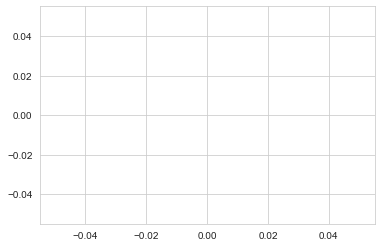

In [71]:
#sns.histplot(data=demo, x= demo['Continente'])
#demo.plot(figsize = (16,8), x='PrecoUnitario', y='Data da Venda', kind='line')
#demo.plot(figsize = (16,8),use_index= 'PrecoUnitario', x = 'Data da Venda', kind = 'kde')

plt.show()
# data=demo, x= demo['PrecoUnitario'], y=demo['Continente']

<AxesSubplot:xlabel='PrecoUnitario', ylabel='Count'>

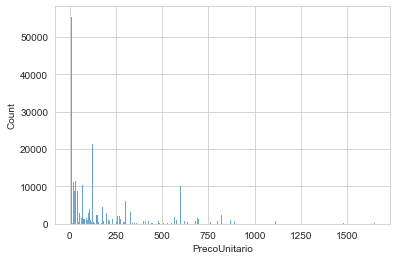

In [33]:
sns.histplot(data=demo, x= demo['PrecoUnitario'])

In [53]:
demo.head(2)

#sns.barplot(data=demo, x= demo['Continente'], y = demo['Valor Venda'])

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,País,Continente,Valor Venda
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França,Europa,1109.00
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos,América do Norte,215.62


In [54]:
demo.head(2)

#sns.lmplot(data= demo, x= demo['Custo Unitário'], y= demo['Qtd. Vendida'])

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,País,Continente,Valor Venda
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França,Europa,1109.00
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos,América do Norte,215.62


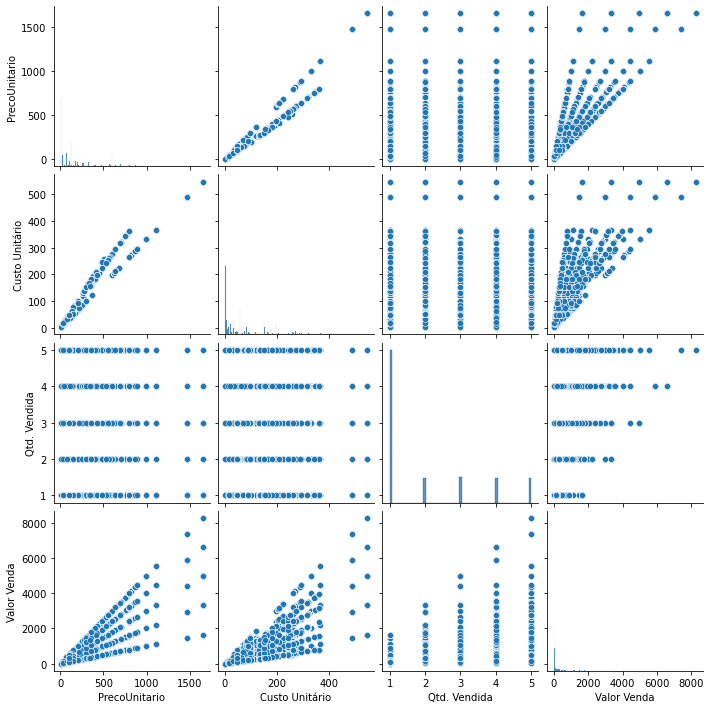

In [55]:
sns.pairplot(data=demo)

<AxesSubplot:xlabel='Continente', ylabel='count'>

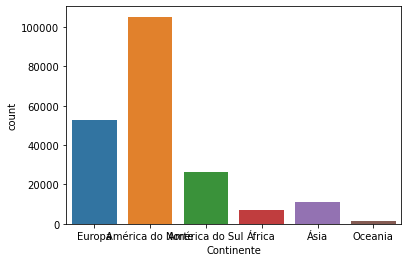

In [68]:
sns.countplot(data=demo, x=demo['Continente'])

----------------

In [56]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203882 entries, 0 to 203881
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Data da Venda   203882 non-null  object 
 1   Produto         203882 non-null  object 
 2   Categoria       203882 non-null  object 
 3   PrecoUnitario   203882 non-null  float64
 4   Custo Unitário  203882 non-null  float64
 5   Marca           203882 non-null  object 
 6   Qtd. Vendida    203882 non-null  float64
 7   Nome Cliente    203882 non-null  object 
 8   País            203882 non-null  object 
 9   Continente      203882 non-null  object 
 10  Valor Venda     203882 non-null  float64
dtypes: float64(4), object(7)
memory usage: 18.7+ MB


In [60]:
demo['País'].value_counts()

Estados Unidos    97748
Reino Unido       15285
Alemanha          14718
França            14084
Chile             13262
Brasil            13082
Canadá             7467
África do Sul      6784
Japão              2512
Itália             1878
China              1817
Austrália          1485
Índia              1174
Rússia             1166
Coreia do Sul       846
Paquistão           587
Tailândia           538
Romênia             530
Irlanda             522
Portugal            505
Turcomenistão       500
Butão               493
Suíça               492
Eslovênia           490
Taiwã               489
Armênia             478
Malta               477
Holanda             473
Espanha             471
Dinamarca           460
Polônia             458
Quirguistão         453
Grécia              452
Irã                 439
Suécia              435
Síria               422
Singapura           410
Name: País, dtype: int64

In [32]:
demo.head(2)

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,País,Continente
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França,Europa
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos,América do Norte


In [33]:
paises = pd.get_dummies(demo['País'])
paises

,Alemanha,Armênia,Austrália,Brasil,Butão,Canadá,Chile,China,Coreia do Sul,Dinamarca,...,Rússia,Singapura,Suécia,Suíça,Síria,Tailândia,Taiwã,Turcomenistão,África do Sul,Índia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203878,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
continentes = pd.get_dummies(demo['Continente'])
continentes

,América do Norte,América do Sul,Europa,Oceania,África,Ásia
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
203877,0,0,1,0,0,0
203878,0,1,0,0,0,0
203879,1,0,0,0,0,0
203880,1,0,0,0,0,0


------------

In [72]:
demo.head(2)

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,País,Continente
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França,Europa
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos,América do Norte


In [73]:
marcas = pd.get_dummies(demo['Marca'])
marcas

,Contoso,Contoso,Hashtag Toys,Litware,Litware,Northwind Traders,Proseware,Southridge Video,Wide World Importers
0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
203877,0,0,0,0,0,1,0,0,0
203878,0,0,0,0,0,1,0,0,0
203879,0,0,0,0,0,1,0,0,0
203880,0,0,0,0,0,1,0,0,0


In [75]:
categorias = pd.get_dummies(demo['Categoria'])
categorias

,Acessórios para Celular,Acessórios para Computador,Acessórios para Câmeras,Ar Condicionado,Cafeteira,Caneta Gravadora,Car Video,Games,Headphone Bluetooth,"Impressoras, Scanners & Fax",Jogos de Tabuleiro,Laptops,MP4&MP3,Monitores,Movie DVD,Sistema de Som,Telefones p/ Casa e Escritório,VCD & DVD,Ventiladores,Water Heaters
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203877,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
203878,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
203879,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
203880,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [77]:
produtos = pd.get_dummies(demo['Produto'])
produtos

,180 CFM Ventilador de Coluna X450 Azul,180 CFM Ventilador de Coluna X450 Branco,180 CFM Ventilador de Coluna X450 Preto,180 CFM Ventilador de Coluna X450 Vermelho,1GB Digital Voice Caneta Gravadora E100 Branco,1GB Digital Voice Caneta Gravadora E100 Pink,1GB Digital Voice Caneta Gravadora E100 Preto,1GB Digital Voice Caneta Gravadora E100 Vermelho,1GB Pulse Smart pen E50 Branco,1GB Pulse Smart pen E50 Prata,...,Zoo Tycoon 2: Zookeeper Collection M260,Zoo Tycoon Complete Collection E110,Zoo Tycoon Complete Collection2009 E150,Zoo Tycoon Dinosaur Digs X200,Zoo Tycoon Dinosaur Digs2009 E162,Zoo Tycoon M380,Zoo Tycoon Marine Mania 2009 E160,Zoo Tycoon Marine Mania E120,Zoo Tycoon2009 E170,Zoo Tycoon2: Marine Mania Expansion Pack 2008 E135
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
datas = pd.get_dummies(demo['Data da Venda'])
datas

,2017-06-01,2017-06-02,2017-06-03,2017-06-04,2017-06-05,2017-06-06,2017-06-07,2017-06-08,2017-06-09,2017-06-10,...,2019-08-22,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-08-30,2019-08-31
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
